<a href="https://colab.research.google.com/github/AntonioWanderer/CompPhys22/blob/main/Bessel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from math import *
import matplotlib.pyplot as plt

In [52]:
def bessel(m, t, x):
  y = cos(m*t - x * sin(t))
  return y

In [53]:
def J(m, x0, dx):
  s=0
  k = int(2*pi/dx)
  for i in range(k):
    s = s + (bessel(m,i*dx,x0)+bessel(m,(i+1)*dx,x0))*dx/2
  return 2/pi*s

In [54]:
def errFind(x, dx):
  #y = (-J(0,x-dx,dx)+J(0,x+dx,dx))/(2*dx) + J(1,x,dx) #1 accuracy
  #y = (1/12*J(0,x-2*dx,dx)-2/3*J(0,x-dx,dx)+2/3*J(0,x+dx,dx)-1/12*J(0,x+2*dx,dx))/dx + J(1,x,dx) #2 accuracy
  y = (-1/60*J(0,x-3*dx,dx)+3/20*J(0,x-2*dx,dx)-3/4*J(0,x-dx,dx)+3/4*J(0,x+dx,dx)-3/20*J(0,x+2*dx,dx)+1/60*J(0,x+3*dx,dx))/dx + J(1,x,dx) #3 accuracy
  return y

Coefficients source https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D1%8B_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB_%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F

0.0020943951023931952


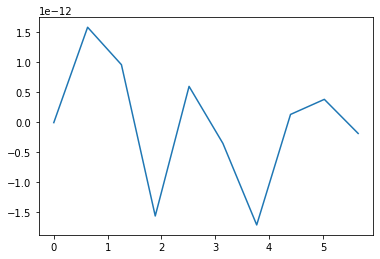

1.7180701306074297e-12


In [55]:
dx = 2*pi/3000
print(dx)
ly = []
lx = []
steps = 10
for i in range(steps):
  x = 2*pi/steps*i
  y = errFind(x, dx)
  lx.append(x)
  ly.append(y)
plt.plot(lx,ly)
plt.show()
print(max([abs(l) for l in ly]))